# Sentiment analysis with Deep Learning (DL)

## Introduction

`Intro` or why Deep Learning is important?

I am Ukrainian and writing this Intro while my family, firends and colleagues are hiding in shelters or defend their cities with Molotov cocktails and bare hands. Russian government is destroying my country and kill my brothers and sisters: hospitals, kindergartens and resedential areas are **bombed**. I am phisically able to write this Intro only because I moved to Germany in August 2020. It is hard to belive that now I am going to discuss Artificila Intelligence while Russian governmant is swiftly going back to Middle Ages and try to drag my country with. 

*Anyway, is there link between war and Deep Learning? - one would ask. And actually - there is.* 

Today, 28/02/2022 it was stated that Reface (https://hey.reface.ai) - worldwide known ukrainian company that uses Deep Learning for entartainment puproses - now take advantage of their available resources to direct the power of Artificial Intelligence and Computer Vision on civilians protection. Their main task is timely detection of military equipment with the streets cameras and information of civilians.

In addition to Computer Vision another important national security challange that can be addressed with Deep Learning is Natural Language Processing (NLP), - sentiment analysis and topic detection in particular. One week before everything has been started I had noticed much increased quantity of hate and "jokes" towards Ukraininans in one of the most popular ukrainian/russian speaking forum Pikabu (https://pikabu.ru). Later, one day before Putin has launched the war against Ukraine, it was confirmed by Pikabu administration (https://pikabu.ru/story/pikabu_i_botyi_8860371) that their website was firstly DDoS'd and then experienced abnormal registration activity. As a consequence (as per administration's comment) 'specific content' (read: hate towards ukrainians) was posted and consequently upvoted along with approving comments. Eventually, 5500 bot accounts were frozen. The same any russian-speaking person could observe on 21 - 23/02/2022 on Instagram news accounts comment sections. Actually I have experienced hate myself - they wrote they will find me in Ukraine and "educate" (whatever it means) because I told that what is happening in Ukraine is called a war (in Russia they call ot "special operation"). 

All things considred, I think that background semantic and sentiment analysis of textual activity on social media like Instagram and Twitter on chosen territory is a very powerful crisis preventive tool. It is not about regular detection of the content going against particualr social media pltaform rules, it is about undestanding how attitudes and narratives in given society are changing over the time. With such tools governments are able to analyze their performance as well as moods in society caused by new laws/policies. I think it gives them time to revert new laws that people don't like, cancel new policies, correct mistakes before people are so unsitisfied with government they want to burn autos and clash with police. And for sure, I guess it can't fully prevent such thing as Russian war against Ukraine. But, if one managed to spot weired activities and attempts to push some particular agenda by bots, it gives time to prepare and develop security/action plan. 

Described tasks require a powerfull tool for deployment, and Deep Neural Network is exactely something that can be used. In this course work I will 


`Objectives`

With this courseworks I aim to:

1. Study of how Deep Lerning techniques can solve Natural Language Processing (NLP) tasks.
2. Research performance of various RNN and CNN layers for NLP classification task: Sentiment Analysis
3. Perform operations with Data Frames containing textual data:
    - Filtering operations
    - Joining of two and more Data Frames together
    - Group by operations
    - Summarizing 
4. Reach performance of meaningful confidence (higher than 75%)
5. Interpret results and find weak sides that can be improved
6. Write further suggestions on model's preformance improvement 


`Baseline performance`

If to assume that the data set is balanced, meaning 3 given classes (Positive, Negative and Neutral) are present in roughly the same quantity, the baseline performance can be set up to ~30%. However, the the minimum meaningful accuracy would be at least 75%.


`Evauation techniques`

As the Course Work solves classififcation task, hence the performace can be evaluated by:
- Confusion matrix
- Accuracy overall and per class 
- Precision
- Recall
- F1 score


## Preparation steps

### 1. Import libraries:

In [1]:
#supportive
import numpy as np
import pandas as pd
import re

#nlp
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer

import gensim
from gensim.models import Word2Vec

#machine learning
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras import models
from keras import layers
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop

from keras.callbacks import EarlyStopping

#visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

[nltk_data] Downloading package punkt to /Users/maria/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/maria/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2. Load dataset and perform typecasting:


**Dataset short description:**

*The source of the dataset: https://www.kaggle.com/crowdflower/twitter-airline-sentiment*

As per Kaggle: "A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify `positive`, `negative`, and `neutral` tweets"


Original data set contains 15 columns: 
- tweet_id, airline_sentiment, airline_sentiment_confidence, negativereason, negativereason_confidence, airline, airline_sentiment_gold, name, negativereason_gold, retweet_count, text, tweet_coord, tweet_created, tweet_location, user_timezone

---

`Step 1.` Load dataset:

In [2]:
df_orig_tweets = pd.read_csv('Tweets.csv', encoding='latin1') #read csv to dataframe
print("> Dataset is loaded:\n")
print(" - quantity of samples:", df_orig_tweets.shape[0])
print(" - quantity of columns:", df_orig_tweets.shape[1])

print("\n> First 5 rows:")
df_orig_tweets.head(5)

> Dataset is loaded:

 - quantity of samples: 14640
 - quantity of columns: 15

> First 5 rows:


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**Comment**: As was mentioned before, it is evident that not each of 15 columns (features) is meaningful for exploratory data analysis (EDA) and further modelling. Majority of thw columns cariies no useful information adn hence I will go further with the subset of columns *airline_sentiment, airline, text, tweet_created*:

In [3]:
columns = ['airline_sentiment', 'airline', 'text', 'tweet_created'] #reduce to 4 columns
df_tweets = df_orig_tweets.loc[:,columns]

print("> Dimensions of the subset:")
print(" - quantity of samples:", df_tweets.shape[0])
print(" - quantity of columns:", df_tweets.shape[1])

df_tweets # created subset

> Dimensions of the subset:
 - quantity of samples: 14640
 - quantity of columns: 4


,airline_sentiment,airline,text,tweet_created
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800
...,...,...,...,...
14635,positive,American,@AmericanAir thank you we got on a different f...,2015-02-22 12:01:01 -0800
14636,negative,American,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22 11:59:46 -0800
14637,neutral,American,@AmericanAir Please bring American Airlines to...,2015-02-22 11:59:15 -0800
14638,negative,American,"@AmericanAir you have my money, you change my ...",2015-02-22 11:59:02 -0800


`Step 2.` Typecasting the last column *tweet_created* into datetime:

Before proceeding to EDA, I will make sure that chosen columns are of correct types:

In [4]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 4 columns):
airline_sentiment    14640 non-null object
airline              14640 non-null object
text                 14640 non-null object
tweet_created        14640 non-null object
dtypes: object(4)
memory usage: 457.6+ KB


The type of the last date column hass to be fixed before EDA:

In [5]:
df_tweets['tweet_created'] = df_tweets['tweet_created'].apply(lambda x: x[:-15]) # take only date, without time stamp
df_tweets['tweet_created'] = pd.to_datetime(df_tweets['tweet_created']) #covert to date type
df_tweets

,airline_sentiment,airline,text,tweet_created
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24
...,...,...,...,...
14635,positive,American,@AmericanAir thank you we got on a different f...,2015-02-22
14636,negative,American,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22
14637,neutral,American,@AmericanAir Please bring American Airlines to...,2015-02-22
14638,negative,American,"@AmericanAir you have my money, you change my ...",2015-02-22


Check the types:

In [6]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 4 columns):
airline_sentiment    14640 non-null object
airline              14640 non-null object
text                 14640 non-null object
tweet_created        14640 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 457.6+ KB


**Comment**: Data types are fixed.

## Data presentation and EDA

### 1. Sentiments distribution

I will start presenatation with exploring the ratio of sentiments. In simple terms - count how many tweet belong to each category - negative, neutral, positive.

`Step 1.` Prepare dataframe summarized by the sentiment (for presentation purposes):

In [7]:
tweet_sent = pd.DataFrame() # create emplty dataframe

# group by sentiment to calculate overall quantity of reviews beloning to each category 
tweet_sent['quantity'] = (df_tweets.groupby(['airline_sentiment'])['airline_sentiment'].count())

# calculate the share of each category
tweet_sent['ratio'] = (df_tweets.groupby(['airline_sentiment'])['airline_sentiment'].count()/len(df_tweets)).apply(lambda x: round(x,2))

# append summarizing line
tweet_sent = tweet_sent.append(tweet_sent.sum().rename('[total]'))

`Step 2.` Initialize variables for storing data needed for plotting:

In [8]:
sentiments = np.unique(df_tweets['airline_sentiment']) #list of sentiments
colors = ["#FF684C", "#FFDA66", "#8ACE7E"] #colors for each class
data = tweet_sent['quantity'].iloc[:-1] #quantity of samples of each class (sentiment)

`Step 3.` Function to plot a pie chart: as arguments it takes the list of sentiments, list of colours to be used and quantity of samples per each class (sentiment).

In [9]:
def plot_pie (sentiments, colors, data, title):
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
    
    # ---- code from the source: START ----
    wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40, colors = colors)

    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
                  bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(sentiments[i], xy=(x, y), size = 14, xytext=(1.1*np.sign(x), 1.1*y),
                        horizontalalignment=horizontalalignment, **kw)

     # ---- code from the source: END ----
    
    ax.set_title(title, size = 16)
    
    plt.show()

Plot itslef:

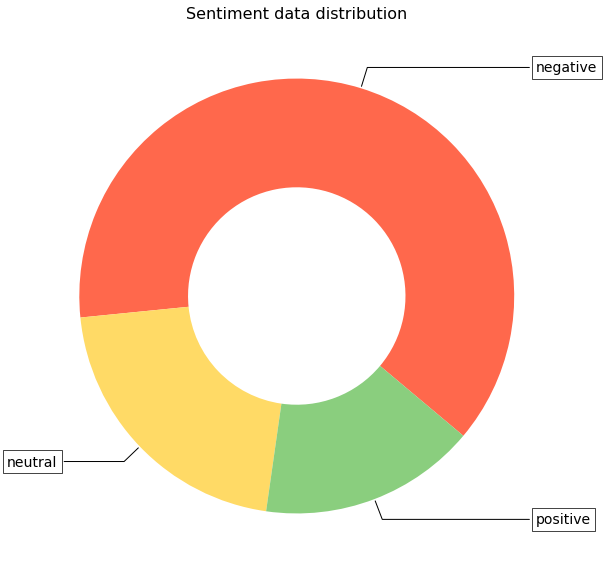

,quantity,ratio
airline_sentiment,,
negative,9178.0,0.63
neutral,3099.0,0.21
positive,2363.0,0.16
[total],14640.0,1.00


In [10]:
plot_pie (sentiments, colors, data, "Sentiment data distribution")
tweet_sent

**Source of the pie chart code**: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html


**Comment**: The main conclusion is: **data set is not balanced**. Majority of samples are labeled as *negative* (63%), meanwhile the least samples belong to *positive* class (16%). The class of *neutral* is acounted ofr roughly 21%. Such difference in quantites may lead to poorer recognition of least presented classes, in other words negative reviews will be recognized much better (and with higher confidence) than positive or neutral.

### 2. Distribution of tweets over the time

Another interesting persective is ditribution of tweets over the time - when, which sentiment and how many. For this purpose I use subset of the main dataframe which contains only dates and sentiments:

In [11]:
#subset of the main dataframe which contains only dates and sentiment 
df_date = df_tweets.loc[:,('tweet_created', 'airline_sentiment')] 
sentiments = np.unique(df_tweets['airline_sentiment']) #list of sentiments
colors = ["#FF684C", "#FFDA66", "#8ACE7E"] #colors for each class


Function to plot tweets from depending on the date they were posted:

In [12]:
def plot_dates(df_date, sentiments, colors):
    
    fig, ax = plt.subplots(figsize=(16,8)) #size of the figure

    count = 0 #counter to iterate through the colors list
    for sent in sentiments:
        df = df_date[df_date['airline_sentiment'] == sent]
        df = pd.DataFrame(df.groupby('tweet_created').count())
        sizes = df.iloc[:, 0] * 5 #reflect quantity of tweets per exact date in buble size
        plt.scatter(df.index, df.iloc[:, 0], 
                    color = colors[count], label = sent, alpha = 0.7,
                    s = sizes)
        plt.legend(loc = 'upper left')
        count = count + 1

    plt.xticks(rotation=45, ha='right')
    plt.title("\nTrain dataset time distribution\n", size = 18)
    plt.show()
    

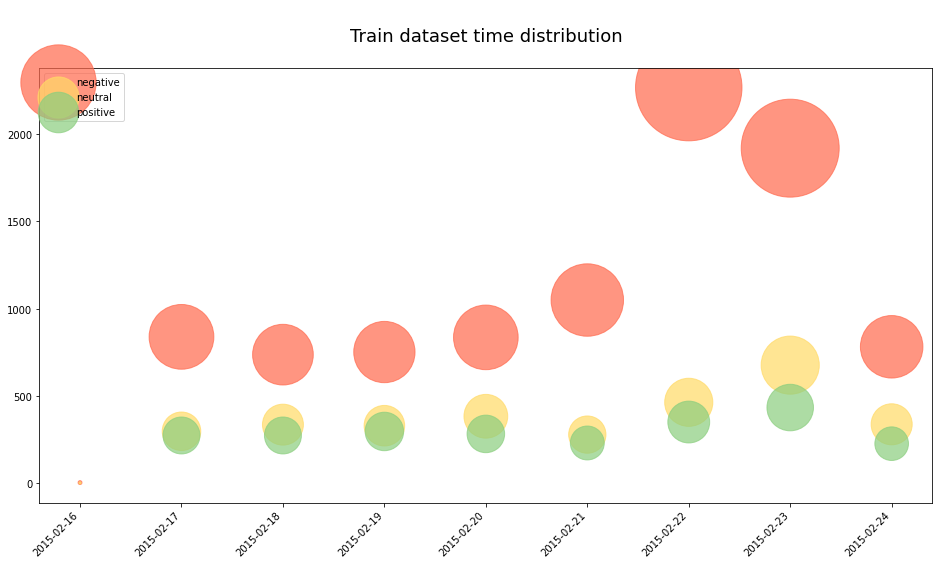

In [13]:
plot_dates(df_date, sentiments, colors)

**Comment :** The data was collected on the specific dates throught the period of January-February 2015. This chart again shows that negative samples heavily outweigh positive and neutral in quantity. 

### 3. Ratio for airlines:

Here I look into:
1. how many reviews were collected for each airline
2. structure of reviews for each airline

`Perspective 1.` Shares of airlines:

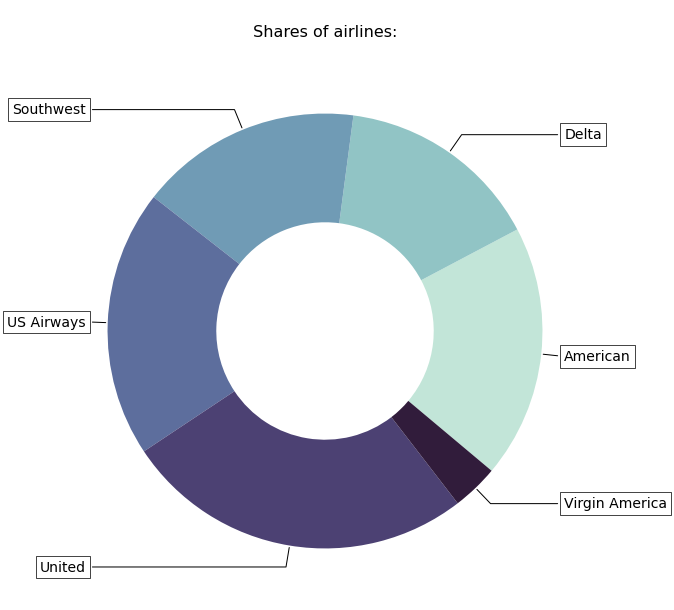

,quantity
airline,
American,2759
Delta,2222
Southwest,2420
US Airways,2913
United,3822
Virgin America,504


In [14]:
#dataframe grouped by airline showing quantity of reviews (tweets)
airlines = pd.DataFrame((df_tweets.groupby(['airline'])).count()['text']) 
airlines = airlines.rename(columns = {'text':'quantity'}) #rename column proeprly
#plot results
plot_pie (airlines.index, sns.cubehelix_palette(start=.5, rot=-.5), airlines['quantity'], "\n Shares of airlines: \n")
plt.show()
airlines

**Comment:** Majority of reviews were left about United airlines and the least - about Virgin America airlines. US Airways, Southwest, Delta and Americat airlines poses more or less the same quantity of reviews.

`Perspective 2.` Sentiments distribution inside each airline - which reviews are more?

In [15]:
#dataframe consolidated by ariline and sentiment, shows count of each
airlines_sent = pd.DataFrame((df_tweets.groupby(['airline', 'airline_sentiment'])).count()['text'])
airlines_sent = airlines_sent.rename(columns = {'text':'quantity'})

airlines_ratio = []

#iterate through airlines in order to calculate ration of tweets belonging to each class
for airline in airlines.index:
    neg_ratio = np.round(airlines_sent.loc[airline]['quantity'].loc['negative']/sum(airlines_sent.loc[airline]['quantity']), 2)
    airlines_ratio.append(neg_ratio)
    neu_ratio = np.round(airlines_sent.loc[airline]['quantity'].loc['neutral']/sum(airlines_sent.loc[airline]['quantity']), 2)
    airlines_ratio.append(neu_ratio)
    pos_ratio = np.round(airlines_sent.loc[airline]['quantity'].loc['positive']/sum(airlines_sent.loc[airline]['quantity']), 2)
    airlines_ratio.append(pos_ratio)
    
airlines_sent['ratio'] = airlines_ratio #add ration column

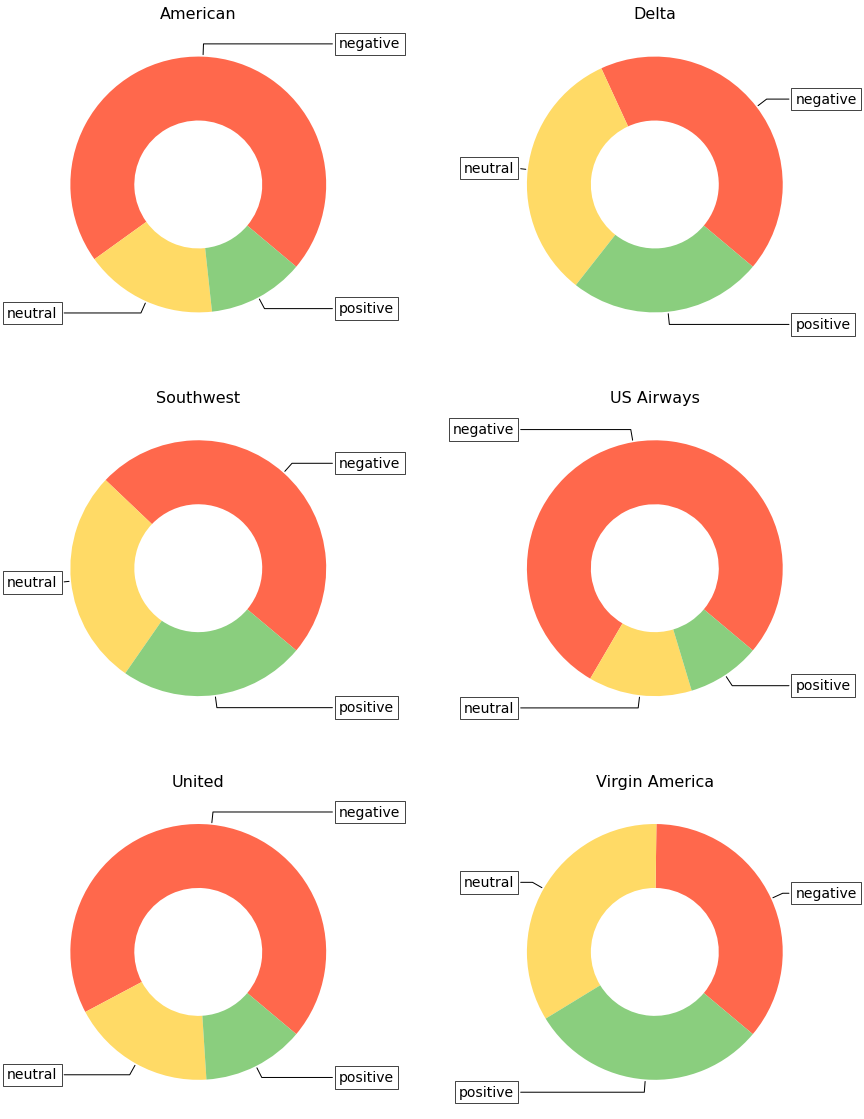

quantity  ratio
airline        airline_sentiment                 
American       negative               1960   0.71
               neutral                 463   0.17
               positive                336   0.12
Delta          negative                955   0.43
               neutral                 723   0.33
               positive                544   0.24
Southwest      negative               1186   0.49
               neutral                 664   0.27
               positive                570   0.24
US Airways     negative               2263   0.78
               neutral                 381   0.13
               positive                269   0.09
United         negative               2633   0.69
               neutral                 697   0.18
               positive                492   0.13
Virgin America negative                181   0.36
               neutral                 171   0.34
               positive                152   0.30

In [16]:

fig, ax = plt.subplots(3,2, figsize=(15, 20), subplot_kw=dict(aspect="equal"))   

count = 0

for k in range(3):
    for j in range (2):
    
        data = airlines_sent.loc[airlines.index[count]]['quantity']
     
        wedges, texts = ax[k, j].pie(data, wedgeprops=dict(width=0.5), startangle=-40, colors = colors)
        bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
        kw = dict(arrowprops=dict(arrowstyle="-"),
                  bbox=bbox_props, zorder=0, va="center")

        for i, p in enumerate(wedges):
            ang = (p.theta2 - p.theta1)/2. + p.theta1
            y = np.sin(np.deg2rad(ang))
            x = np.cos(np.deg2rad(ang))
            horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
            connectionstyle = "angle,angleA=0,angleB={}".format(ang)
            kw["arrowprops"].update({"connectionstyle": connectionstyle})
            ax[k, j].annotate(sentiments[i], xy=(x, y), size = 14, xytext=(1.1*np.sign(x), 1.1*y),
                        horizontalalignment=horizontalalignment, **kw)

        ax[k, j].set_title(airlines.index[count], size = 16)
        count = count + 1

plt.show()
airlines_sent

**Comment:** Among all airlines, the biggest quantity of negative reviews belongs to United airlines and the least negative reviews has Virgin America airlines. Yet, it does not mean that the first is the worst and the latter is the best. The explanation is that the dataset is not balanced both in terms of sentiments and in terms of airlines.Science the difference in review is significant. it worths to evaluate each airline onlywhithin itself in percent. This way, the biggest share of negative reviews in percent belongs to US Airways (neraly 78%), while the least belongs to Virgin America (nearly 38%). The same airline has the biggest she of positive reviews - 30%. 

## Cleaning data

Cleaning data  is crucial for the model's performance. In order to distinguish between the classes, representative of each has to have special traits and somehow differ from another, e.g. words 'good', 'joy', 'amazing' are more likely to be met in positive review rather than in negative. So word 'good' becomes kind of a trait of positive review while 'bad' becomes a trait of negative one. But, raw tweets contain a lot of tokens, not all of them are so concrete as 'good' or 'bad'. There are a lot of bottlenecks and here is how I address it:

1. Since machines read charachters by their ASCII code, 'c' and 'C' are undestood as different symbols for the machine. And hence, word 'Good' and 'good' will be undestood as different tokens. To prevent it, first step is turn all word into lower case.

2. What about words that can be met in all types of reviews like 'I', 'only', 'before' or non-alpha charachters like '@', '?' or '.' ? Those words and charachters are misleading, even human cannot say if those are signs of bad or good review. Hence, all those have to be removed, as they carry next to zero information about the possbile sentiment.

3. The same word may take different linguistic froms, it depends on the context but do not change the sense. In order to group these various forms of the word together and treat them as a sigle term, I use lammatization. This is a text normalization technique which resolves words to their linguistic roots, and subsequently helps to increase recognition of the sentiment and hence, - improve performance.

**1. Lower**: Change to lower case all samples.

This step is needed to treat "Good" and "good" as the same word.

In [17]:
df_tweets['text'] = df_tweets['text'].str.lower()

**2. Removing confusing tokens and empty tweets**

- Stopwords and punctuation

List of english stopwords contain 

In [18]:
stopwords_list = list(stopwords.words('english'))

In [19]:
df_tweets['text'] = df_tweets['text'].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords_list and word.isalpha()]))

- Various low-meaningful tokens: non-unicode, URL, @tagging, e-mail

In [20]:
pattern0 = r"[^\x00-\x7F]+\ *(?:[^\x00-\x7F]| )*" #non-unicode

#URL
pattern1 = r"(https?:\/\/)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)" 

pattern2 = r"(^|\W)@\b([-a-zA-Z0-9._]{3,25})\b" #tagging

#e-mail
pattern3 = r"[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*@(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?"

patterns = [pattern0, pattern1, pattern2, pattern3]


for pattern in patterns:
    df_tweets['text'] = df_tweets['text'].apply(lambda x: re.sub(pattern, " ", x))



- Empty tweets:

In [21]:
df_tweets = df_tweets[df_tweets['text'].str.len()>0]

In [22]:
df_tweets.head(10)

,airline_sentiment,airline,text,tweet_created
1,positive,Virgin America,plus added commercials,2015-02-24
2,neutral,Virgin America,must mean need take another,2015-02-24
3,negative,Virgin America,really aggressive blast obnoxious faces little...,2015-02-24
4,negative,Virgin America,really big bad thing,2015-02-24
5,negative,Virgin America,seriously would pay flight seats really bad th...,2015-02-24
6,positive,Virgin America,nearly every time fly vx go away,2015-02-24
7,neutral,Virgin America,really missed prime opportunity men without hats,2015-02-24
9,positive,Virgin America,arrived hour good,2015-02-24
10,neutral,Virgin America,know suicide second leading cause death among ...,2015-02-24
11,positive,Virgin America,pretty much better minimal,2015-02-24


**3. Text normalization**

Text normalization is done with the help of lemmatization. This is the technique which helps to group various forms of the word together and treat them as a sigle term. Here it is implemeted throught resolving words to their linguistic roots, and subsequently helps to increase recognition of the sentiment and hence, - improve performance.

In [23]:
wnl = WordNetLemmatizer() # Lemmatizer from nltk

In [24]:
df_tweets["text"] = df_tweets["text"].apply(lambda x: nltk.word_tokenize(x))
df_tweets["text"] = df_tweets["text"].apply(lambda x: " ".join([wnl.lemmatize(w) for w in x]))

/Users/maria/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/maria/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
df_tweets.head()

,airline_sentiment,airline,text,tweet_created
1,positive,Virgin America,plus added commercial,2015-02-24
2,neutral,Virgin America,must mean need take another,2015-02-24
3,negative,Virgin America,really aggressive blast obnoxious face little ...,2015-02-24
4,negative,Virgin America,really big bad thing,2015-02-24
5,negative,Virgin America,seriously would pay flight seat really bad thi...,2015-02-24


**Comment :** Cleaning is done

## Building, Hypertuning Training Neural Network model

### Methodology



**`Step 1: Prepare tweets`**

1. Tokenize tweets to the word level with the help of 
Vocab (Vocabluary) is the array of all unique features (words) from the whole dataset that remained after cleaning. These words are keys and values are indecies of these words incremented by one: 

>*If the list of all words woule be  ['I', 'love', 'you', ...], than the vocabluary would be {'I':1, 'love':2, 'you':3, ....}*

---

**`Step 2: Develop and run Neural Network bulding class`**

The class has ro perform the follwoing tasks:
1. Encode textual data samples as numbers - X
2. Encode lables (sentiments) as numbers - Y
3. Split X and Y on test and training sets
4. Build neural network as per given para,etrs and architectire
5. Fit model on training data
6. Predict on test data

This class helps to create Neural Network entity of Keras. The main idea here is to save time during hyperparametrs tunning and support work with friendly interface through the methods which help to reduce typos and discrepencies.
Before defining fields and methods this class would consist of, it is crucial to:

- decide on the type of Neural Network
- pre-develop architecture of the model

To do the first, one need to consider type of the problem, this one includes text seuqneces (natural language), and hence, the optimal options would be RNN (Recurrent Neural Network) and/or CNN (Convolutional Neural Network). For this course work I will implement the model combined of CNN and RNN layers. 

While CNN offer only 1 possible sutiable option for the text sequence problem:
- 1D convolutional layer followed by MaxPooling layer

RNN can offer several options of layers for the task of NLP, e.g. 
- simple RNN layer
- layer with gated recurrent units - GRU
- layer with technique long short-term memory - LSTM
- bidirectional variations of recurrent layers (both LSTM and GRU) 

Choosing one of the last 4 options (GRU, LSTM, biderectional GRU, biderctinoal LSTM) would be the part of hypeparametrs tunning process. Hence, the possible architectures are the following:

|Layer type   ||Option 1       |Option 2       |Option 3       |Option 4       |
|:------------||:--------------|:--------------|:--------------|:--------------|      
|**Input**    ||Embedding layer|Embedding layer|Embedding layer|Embedding layer|
|             ||               |               |               |               |
|**Hidden**   ||Conv1D         |Conv1D         |Conv1D         |Conv1D         |
|             ||MaxPooling     |MaxPooling     |MaxPooling     |MaxPooling     |
|             ||GRU            |LSTM           |bi_GRU         |bi_LSTM        |
|             ||               |               |               |               |
|**Output**   ||Dense          |Dense          |Dense          |Dense          |



In order to create NN models with proposed architectures, NN building class should have the following:

- **Fields**:
    
|Field|Description|
|:----|:----|
|**X, Y**|store data (X) and respective labels (Y) accordingly|
|**X_train, y_train, X_test, y_test**| X and Y both split into test and training sets|
|**y_pred**| field to store decoded predictions (labels 0, 1 or 2)|
|**y_pred_probs**|field to store prediction probabilities of each class ( e.g. [0.1, 0.2, 0.7] -> predicted label is 2 with confidence 70%)|
|**model**|field to store model|
|**sentiments**|list of sentiments (= class labels)|
|**max_features**|number of words to consider as features|
|**maxlen**|cut texts after this number of words|
|**encode_dict**|dictionary with encoded sentiments if the form {sentiment:index}, where index = 0,1 or 2|
|**words**|tokenized data frame (word level)|
|**self_history**|initialize field for keras history object|

    
- **Methods**:

|Method|Description short|
|:---|:---|
|**Initialization**|Initialize all fields of the class|
|**Encode and split**|Encodes data samples and respective lables (sentiments) as numbers|
|**Build model**|Takes hyperparametrs and other guiding variables as input and build respective NN model|
|**Fit**|Fit built model on training data|
|**Predict**|Return already decoded preidctions|

Detailed description of the methods is further.

---

**`Step 3: Tune hyperparametrs`**

Overall there are the following hyperparametrs:

- `Network level`:
    - quantity and type of hidden layers
   
- `Layer level`:
    - quantity of hidden units
    - quantity of filters
    - activation function
    - recurrent activation function
    - dropout rate
    - recurrent dropout rate
    
    
- `Compilation stage`:
    - learning rate
    - momentum


Out the mentioned above hypreparametrs, the following will be hypertuned: 

- `Network level`:
    - type of layers: [GRU, LSTM, biderectional GRU, biderctinoal LSTM]
- `Layer level`:
    - quantity of hidden units: [32, until converge)
    - quantity of filters: [2, until converge)
    - dropout rate: [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
    - recurrent dropout rate: [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]

And the rest will be set up as follows:

**Hyperparametrs**
- activation function: default 'tahn'
- recurrent activation function: default 'sigmoid'
- learning rate: default value
- momentum: default value

**Strategy**    
- `Optimizer`: RMSprop (root mean squared propagation)
- `Loss`: sparse categorical crossentropy


**Other**
- epochs: 
    - 10 epochs for hypertunning with early breake after 1 epoch with hihger loss
    - for final model will be found heuristically
- batch_size: 32 samples

#### 1. Prepare tweets

In the future, not the whole vocabluarry might be used. In order to ensure the best performance, I use nltk frequency distribution function that creates the from the text the list of tuples of form (word, frequency). This helps to sort all unique words (read all fetures) in desceding order starting from the most popular. This allows to use top N words in the future for the training purposes: 

In [26]:
words = np.array(df_tweets['text'].apply(lambda x: nltk.word_tokenize(x))) #tokenize tweets to the words level
tweet_lens = [len(i) for i in words]#array to store lengths of each tweet (in quantity of words)

words_str = nltk.FreqDist(nltk.word_tokenize(" ".join(df_tweets["text"]))).most_common() #tupels (word, frequency)
unique_words = [i[0] for i in words_str]#array to store all unique words
vocab = {k:v for k,v in zip(unique_words, np.arange(1, len(unique_words)))}  #create vocabluary       
vocab_size = len(vocab) #size of the vocabluary

#### 2. NN_builder class

#### Detailed description of the methods:

***Initialization***:

Initialize all fields of the class. Method is called automatically once the instance of the class is created and takes as input:

- `maxlen` - integer, standard length for all tweets (defined heuristically) - longer tweets will be cut off and shorter will be extended with zeros to the defined length. 
- `max_features` - integer, in simple terms it is the size of vocabluary to be used for NN,This value is arbitrary and can differ from actual quantity of unique terms used in corpora.
- `words` - tensor with shape (max_len, n) containing tokenized to words level tweets, where n - quantity of samples 
- `sentiments` - tensor containing unique sentiments of shape (n,), where n - quantity of sentiments

---

***Encode and split***:

This method performs the following:
1. encoding tweets as numerical vecotrs:
    - creates an instance of Keras Tokenizer with respect to max_features
    - fits instance on the tokenized data
    - encodes textual tweets as numerical vecors of fixed magnitude max_len
2. encoding labels as numbers:
    - e.g. negative as 0, nutral as 1 and positive as 2
3. splitting dataset and respective labels on training and testing subsets

---

***Build model***:

This method takes as input name(type) of the RNN layer, number of units for hidden layers, dropout rate, recurrent dropout rate, number of filters for CNN layer. Unpon the input it builds a keras NN model as per architecture described above and passed type of the RNN layer.

---

***Fit***:

Compiles and fits model on the data. As input it takes number epochs, flag that defines to return history object or not (set as False by dafault), number of epochs after the epoch with worse validation loss, after which running is interrupted.  

---
***Predict***:

Returns prediction of the model in form of 1D tensor with sentiments encoded as numbers. 

---


The class itself:

In [27]:
class NN_assistant (object):
    
    
    """
    Initialization method
    """
    
    def __init__(self, words, max_features, maxlen, sentiments):
     
        # initialize X and Y
        self.X = None
        self.y = None
        
        # initialize train and test subsetst for each
        self.X_train = None
        self.X_test = None 
        self.y_train = None
        self.y_test = None
        
        # field to store prediction
        self.y_pred = []
        
        # field to store prediction probabilities of each class
        self.y_pred_probs = None
        
        # field to store model
        self.model = None

        # list of sentiments (= class labels)
        self.sentiments = sentiments
        
        # Number of words to consider as features
        self.max_features = max_features
        
        # Cut texts after this number of words 
        self.maxlen = maxlen
        
        # Dictionary with encoded sentiments if the form {sentiment:index}, where index = 0,1 or 2
        self.encode_dict = {k:v for k,v in zip(self.sentiments, np.arange(len(self.sentiments)))}
        
        # Tokenized data frame (word level)
        self.words = words
        
        # Initialize field for keras history object
        self_history = None
    
    
    """
    Encode labels and samples; split data and lables into trainit and test subsets
    """
    
    def encode_n_split (self):

        # Transforms text to a sequence of integers
        tokenizer = Tokenizer(num_words = self.max_features, lower = True, split = ' ') # init tokenizer
        tokenizer.fit_on_texts(self.words) # fit on data
        self.X = tokenizer.texts_to_sequences(self.words) # tokrnization process itself
        
        # Pad sequences to the same length
        self.X = pad_sequences(self.X, padding='pre', maxlen = self.maxlen)
        self.y = np.array([self.encode_dict[sent] for sent in list(df_tweets['airline_sentiment'])])
    
        #split training set
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, 
                                                                                random_state=42)
    
    """
    Model initialization and bulding (adding layers)
    """
    
    # build model
    def build_model(self, option, units, dropout, recurrent_dropout, filter_):
        
        self.model = Sequential()
        
        self.model.add(layers.Embedding(self.max_features, units, input_length = self.maxlen))
        self.model.add(layers.Conv1D(units, kernel_size = filter_, padding ='same', activation = 'relu'))
        self.model.add(layers.MaxPooling1D(pool_size = filter_))
        
        # add layer depending on chosen option of the hidden layer
        
        if option == 'GRU':
            self.model.add(layers.GRU(units, dropout = dropout,
                                      recurrent_dropout = recurrent_dropout))
        if option == 'LSTM':
            self.model.add(layers.LSTM(units, dropout = dropout,
                                       recurrent_dropout = recurrent_dropout))
        if option == 'bi_GRU':
            self.model.add(layers.Bidirectional(layers.GRU(units, dropout = dropout,
                                                           recurrent_dropout = recurrent_dropout)))
        if option == 'bi_LSTM':
            self.model.add(layers.Bidirectional(layers.LSTM(units, dropout = dropout,
                                                            recurrent_dropout = recurrent_dropout)))
        
        self.model.add(layers.Dense(3, activation = 'sigmoid'))

    
    """
    Compile and fit model onto data
    """
    def fit_mod(self, epochs, history_flag = False, patience = 1): #add patiens as parametr
        
        self.model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
        
        if history_flag:
            self.history = self.model.fit(self.X_train, self.y_train,
                      epochs = epochs,
                      batch_size = 32,
                      validation_split = 0.2,
                      callbacks = [EarlyStopping(monitor = 'val_loss', patience = patience)])
            
            return self.history
        
        else:
            self.model.fit(self.X_train, self.y_train,
                           epochs = epochs,
                           batch_size = 32,
                           validation_split = 0.2,
                           callbacks = [EarlyStopping(monitor = 'val_loss', patience = patience)])
    
    
    """
    Predict
    """
    def predict(self):
        self.y_pred_probs = self.model.predict(self.X_test)
        
        for probs in self.y_pred_probs:
            self.y_pred.append(np.argmax(probs))
        
        return self.y_pred

Here is the helper function for the quick NN model building with the use of NN_assistant class:

In [28]:
def quick_build (words, features, max_len, sentiments, layer, units, dropout, recurrent_dropout, filter_, epochs, save_history, patience):
    
    my_NN = NN_assistant(words, features, max_len, sentiments)
    my_NN.encode_n_split()
    my_NN.build_model(layer, units, dropout, recurrent_dropout, filter_)
    history = my_NN.fit_mod(epochs, save_history, patience = patience)
    
    return my_NN, history

#### 3. Tune hyperparametrs

During this step I hypertune:
- type of the layer: GRU, LSTM, bi_GRU or bi_LSTM
- number of units in hidden CNN and RNN layers
- number of filetrs for CNN layer
- dropout rate- recurrent dropout rate

- 3.1. Hypertunning of type of the `RNN layer`, `units` and `filters`:

In [29]:
def tune_NN(words, epoch, layers_set, units_set, filters_set, features, max_len):
    
    
    """
    Step 0: define initial values of the hyperparams and others
    """
    
    #hyperparams
    units = units_set['start'] #units in hidden layers
    filter_ = filters_set['start'] #filters in hidden layer
    
    #orhers
    #features = features_set['start'] #overall quantiy of fetures (unique words)
    #max_len = lengths_set['start'] # maximal lenght of the sample (quntity pf words after which review id cut off)
    
    
    """
    Step 1: initialize network, encode X and Y, split data
    """
    
    #initialize network entity
    my_NN = NN_assistant(words, features, max_len, sentiments)
    #encode X and Y and split data into train and test
    my_NN.encode_n_split()  
    
    """
    Step 2: helping variables
    """
    
    # dictionary with key as layer and value as another dictionary with respective params and validation loss 
    history_dict = {}
    
    # variables to track in loss improves
    old_loss = 0
    new_loss = 0
    
    """
    Step 3: Nested loops
    
    Outer loop: through layer (fixed amount of options)
    Middle loop: through units options (unitl converge)
    Inner loop: through filter options (until converge)
    """
    dropout = 0
    recurrent_dropout = 0 
    
    # outer loop
    for layer in layers_set:
        
        # each layer starts optimization from the initial units and filters values
        units = units_set['start'] 
        filter_ = filters_set['start']
        
        print("\n Layer: ", layer, '\t Units: ', units, '\t Filter: ', filter_, "\n")
        
        # build model
        my_NN.build_model(layer, units, dropout, recurrent_dropout, filter_)
        # fit model onto data and store history object
        history = my_NN.fit_mod(epoch, True)
        # define onl
        old_loss = np.min(history.history['val_loss'])
        
        optimized_units = False
        optimized_filter = False
        
        
        # middle loop
        while not optimized_units:
            
            units = units + units_set['step']
            
            print("\n Layer: ", layer, '\t Units: ', units, '\t Filter: ', filter_, "\n")
            
            my_NN.build_model(layer, units, dropout, recurrent_dropout, filter_)
            history = my_NN.fit_mod(epoch, True)
            new_loss = np.min(history.history['val_loss'])
            
            if old_loss < new_loss:
                optimized_units = True
                units = units - units_set['step']
                
                # inner loop
                while not optimized_filter:
                    
                    print("\n Layer: ", layer, '\t Units: ', units, '\t Filter: ', filter_, "\n")
                    
                    filter_ = filter_ + filters_set['step']
                    
                    my_NN.build_model(layer, units, dropout, recurrent_dropout, filter_)
                    history = my_NN.fit_mod(epoch, True)
                    new_loss = np.min(history.history['val_loss'])
                    
                    if old_loss < new_loss:
                        optimized_filter = True
                        filter_ = filter_ - filters_set['step']
                        
                        history_dict[layer] = {'units' : units, 'filter' : filter_, 'loss' : np.min(history.history['val_loss'])}
                        
                    else:
                        old_loss = new_loss
                
            else:
                old_loss = new_loss
                
        
    return history_dict   
    

Before jumping into building and hypertunning a real model, the last step twould be defining up the `number of unique features` and the standrad `length` for all vectors (encoded tweets).

Here is some metrics to take into consideration beofre difining the values:

In [30]:
print("Vocab size: \t\t", vocab_size)
print("Mean tweet length: \t", int(np.mean(tweet_lens)))
print("Max tweet length: \t", int(np.mean(tweet_lens)*3))


Vocab size: 		 7585
Mean tweet length: 	 6
Max tweet length: 	 20


Respectively:

In [31]:
#additional
features = 7500 #7500 most frequent terms
max_len = 20 #unpon max tweet length

Initialization of discussed earlier options:

In [32]:
layers_set = ['LSTM', 'GRU', "bi_LSTM", "bi_GRU"] #options for RNN layer
units_set = {'start':32,'step':32} #option for hidden units: start from 32 and increase by 32 until converge
filters_set = {'start':2, 'step':1} #option for CNN layer filters: start from 2 and increase by 1 until converge

epochs = 10

Now all is set set up to start hypertunning process:

In [33]:
history_dict = tune_NN(words, epochs, layers_set, units_set, filters_set, features, max_len)


 Layer:  LSTM 	 Units:  32 	 Filter:  2 

Epoch 1/10
287/287 [==============================] - 7s 14ms/step - loss: 0.7894 - acc: 0.6630 - val_loss: 0.6729 - val_acc: 0.7127
Epoch 2/10
287/287 [==============================] - 3s 10ms/step - loss: 0.6297 - acc: 0.7433 - val_loss: 0.6115 - val_acc: 0.7493
Epoch 3/10
287/287 [==============================] - 3s 10ms/step - loss: 0.5681 - acc: 0.7712 - val_loss: 0.5905 - val_acc: 0.7572
Epoch 4/10
287/287 [==============================] - 3s 10ms/step - loss: 0.5159 - acc: 0.7968 - val_loss: 0.5642 - val_acc: 0.7646
Epoch 5/10
287/287 [==============================] - 3s 10ms/step - loss: 0.4635 - acc: 0.8189 - val_loss: 0.5745 - val_acc: 0.7646

 Layer:  LSTM 	 Units:  64 	 Filter:  2 

Epoch 1/10
287/287 [==============================] - 7s 15ms/step - loss: 0.7465 - acc: 0.6821 - val_loss: 0.6512 - val_acc: 0.7376
Epoch 2/10
287/287 [==============================] - 4s 14ms/step - loss: 0.5741 - acc: 0.7668 - val_loss: 0.6453 -

Epoch 4/10
287/287 [==============================] - 6s 22ms/step - loss: 0.4121 - acc: 0.8401 - val_loss: 0.6025 - val_acc: 0.7642

 Layer:  bi_GRU 	 Units:  64 	 Filter:  2 

Epoch 1/10
287/287 [==============================] - 8s 15ms/step - loss: 0.7766 - acc: 0.6598 - val_loss: 0.6844 - val_acc: 0.7018
Epoch 2/10
287/287 [==============================] - 3s 12ms/step - loss: 0.6360 - acc: 0.7354 - val_loss: 0.6435 - val_acc: 0.7223
Epoch 3/10
287/287 [==============================] - 4s 13ms/step - loss: 0.5539 - acc: 0.7722 - val_loss: 0.6308 - val_acc: 0.7302
Epoch 4/10
287/287 [==============================] - 4s 12ms/step - loss: 0.4782 - acc: 0.8040 - val_loss: 0.6520 - val_acc: 0.7306


As a result of tunning, below is the set of best hyperparametrs for each layer type. The metric for defining the best set was the lowest validation loss.

In [34]:
results_tunned = pd.DataFrame.from_dict(history_dict).T
results_tunned

,units,filter,loss
LSTM,64.0,2.0,0.627508
GRU,64.0,2.0,0.633785
bi_LSTM,32.0,2.0,0.666721
bi_GRU,64.0,2.0,0.630767


The best option out of four is:

In [35]:
best_option = results_tunned[results_tunned['loss'] == min(results_tunned['loss'])]
best_option

,units,filter,loss
LSTM,64.0,2.0,0.627508


Now I train NN with best option to see if adding higher regularization parameter is needed:

In [36]:
my_NN, history = quick_build (words, features, max_len, sentiments, layer = best_option.index, 
                              units = int(best_option['units']), dropout = 0, recurrent_dropout = 0, 
                              filter_ = int(best_option['filter']), epochs = 10, 
                              save_history = True, patience = 10)

Epoch 1/10
287/287 [==============================] - 7s 15ms/step - loss: 0.7554 - acc: 0.6748 - val_loss: 0.6292 - val_acc: 0.7441
Epoch 2/10
287/287 [==============================] - 4s 13ms/step - loss: 0.5799 - acc: 0.7685 - val_loss: 0.5808 - val_acc: 0.7616
Epoch 3/10
287/287 [==============================] - 4s 13ms/step - loss: 0.4979 - acc: 0.8026 - val_loss: 0.5674 - val_acc: 0.7611
Epoch 4/10
287/287 [==============================] - 4s 13ms/step - loss: 0.4432 - acc: 0.8324 - val_loss: 0.5950 - val_acc: 0.7642
Epoch 5/10
287/287 [==============================] - 4s 12ms/step - loss: 0.4025 - acc: 0.8466 - val_loss: 0.6067 - val_acc: 0.7650
Epoch 6/10
287/287 [==============================] - 4s 13ms/step - loss: 0.3709 - acc: 0.8582 - val_loss: 0.6474 - val_acc: 0.7620
Epoch 7/10
287/287 [==============================] - 4s 13ms/step - loss: 0.3433 - acc: 0.8698 - val_loss: 0.7038 - val_acc: 0.7302
Epoch 8/10
287/287 [==============================] - 4s 13ms/step - 

Helper plot function:

In [37]:
def plot_results (y_list, y_labels, epochs, title):    
    
    plt.figure(figsize = (12,6))
    
    x =  range(1, epochs + 1)
    
    for i in range(len(y_list)):
        plt.plot(x, y_list[i], label = y_labels[i], linewidth = 3)
        
    plt.xlabel('Epochs')
    plt.title(title)
    plt.legend()
    plt.show()

Plot results:

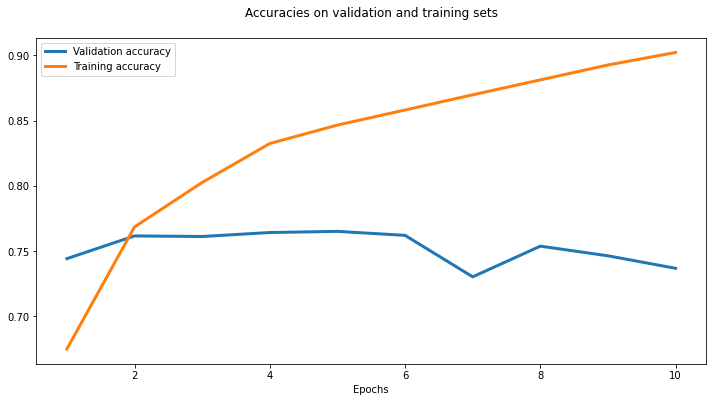

In [38]:
y1 = history.history['val_acc']
y1_label = 'Validation accuracy'

y2 = history.history['acc']
y2_label = 'Training accuracy'

plot_results ([y1, y2],[y1_label, y2_label], 10, "Accuracies on validation and training sets\n")

**Comment :** Evidently, there is a slight overfitting. Feedforward dropout and recurrent dropout tunning should be introduced.

- 3.2 Tunning of `dropout`

In [39]:
history_dict = {}

dropout_set = {'start':0.1, 'step':0.05, 'max':0.45}

my_NN = NN_assistant(words, features, max_len, sentiments)
my_NN.encode_n_split()


dropout = dropout_set['start']

while dropout <= dropout_set['max']:
    
    print("\n Dropout:", dropout, "\n")
    
    my_NN, history = quick_build (words, features, max_len, sentiments, layer = best_option.index, 
                                  units = int(best_option['units']), dropout = dropout, recurrent_dropout = 0,
                                  filter_ = int(best_option['filter']), epochs = 10, 
                                  save_history = True, patience = 10)
    history_dict[dropout] = history.history
    dropout = dropout + dropout_set['step']
    


 Dropout: 0.1 

Epoch 1/10
287/287 [==============================] - 7s 15ms/step - loss: 0.7524 - acc: 0.6780 - val_loss: 0.6266 - val_acc: 0.7371
Epoch 2/10
287/287 [==============================] - 4s 13ms/step - loss: 0.5928 - acc: 0.7577 - val_loss: 0.5783 - val_acc: 0.7611
Epoch 3/10
287/287 [==============================] - 4s 13ms/step - loss: 0.5112 - acc: 0.7986 - val_loss: 0.6066 - val_acc: 0.7589
Epoch 4/10
287/287 [==============================] - 4s 13ms/step - loss: 0.4576 - acc: 0.8249 - val_loss: 0.5893 - val_acc: 0.7585
Epoch 5/10
287/287 [==============================] - 4s 13ms/step - loss: 0.4177 - acc: 0.8394 - val_loss: 0.5881 - val_acc: 0.7655
Epoch 6/10
287/287 [==============================] - 4s 13ms/step - loss: 0.3834 - acc: 0.8526 - val_loss: 0.5991 - val_acc: 0.7659
Epoch 7/10
287/287 [==============================] - 4s 13ms/step - loss: 0.3557 - acc: 0.8673 - val_loss: 0.6565 - val_acc: 0.7533
Epoch 8/10
287/287 [==============================] 

287/287 [==============================] - 7s 16ms/step - loss: 0.7645 - acc: 0.6706 - val_loss: 0.6555 - val_acc: 0.7432
Epoch 2/10
287/287 [==============================] - 4s 14ms/step - loss: 0.6126 - acc: 0.7502 - val_loss: 0.5957 - val_acc: 0.7550
Epoch 3/10
287/287 [==============================] - 4s 14ms/step - loss: 0.5364 - acc: 0.7884 - val_loss: 0.5650 - val_acc: 0.7677
Epoch 4/10
287/287 [==============================] - 4s 14ms/step - loss: 0.4819 - acc: 0.8116 - val_loss: 0.5614 - val_acc: 0.7646
Epoch 5/10
287/287 [==============================] - 4s 14ms/step - loss: 0.4415 - acc: 0.8318 - val_loss: 0.5770 - val_acc: 0.7672
Epoch 6/10
287/287 [==============================] - 5s 16ms/step - loss: 0.4036 - acc: 0.8475 - val_loss: 0.6165 - val_acc: 0.7637
Epoch 7/10
287/287 [==============================] - 5s 16ms/step - loss: 0.3790 - acc: 0.8580 - val_loss: 0.6062 - val_acc: 0.7663
Epoch 8/10
287/287 [==============================] - 4s 14ms/step - loss: 0.356

Plot results:

In [40]:
val_acc_list = []
acc_list = []

for option in history_dict:
    val_acc_list.append(history_dict[option]['val_acc'])
    acc_list.append(history_dict[option]['acc'])

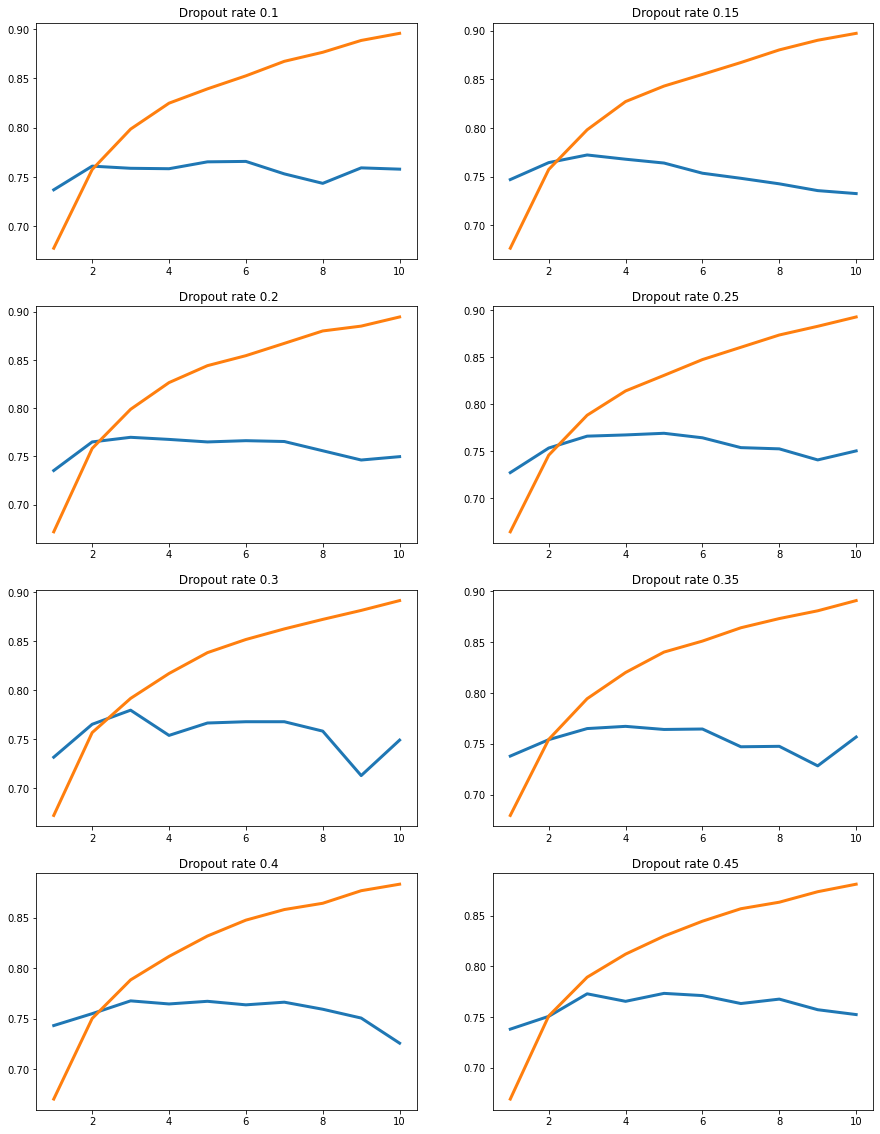

In [41]:
fig, ax = plt.subplots(4, 2, figsize=(15, 20))

x = range(1, 10 + 1)

count = 0

for i in range(4):
    for j in range(2):
        
        ax[i][j].plot(x, val_acc_list[count], label = list(history_dict.keys())[count], linewidth = 3)
        ax[i][j].plot(x, acc_list[count], label = list(history_dict.keys())[count], linewidth = 3)
        dropout_rate = np.round(list(history_dict.keys())[count], 2)
        dropout_str = " Dropout rate " + str(dropout_rate)
        ax[i][j].set_title(dropout_str)
        count = count + 1

**Comment**: As per charts above, the best option is dropout rate would be 0.45 - the smoothest validation accuracy curve:

In [42]:
layer_name = str(best_option.index[0])
best_option.loc[layer_name,'dropout'] = 0.45
best_option

/Users/maria/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/maria/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:381: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(new_indexer, value)
/Users/maria/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pa

,units,filter,loss,dropout
LSTM,64.0,2.0,0.627508,0.45


- 3.3. Tunning of `recurrent dropout`:

In [43]:
history_dict = {}

recurrent_dropout_set = {'start':0.1, 'step':0.05, 'max':0.45}

my_NN = NN_assistant(words, features, max_len, sentiments)
my_NN.encode_n_split()


recurrent_dropout = recurrent_dropout_set['start']

while recurrent_dropout <= recurrent_dropout_set['max']:
    
    print("\n Recurrent dropout:", recurrent_dropout, "\n")
    
    my_NN, history = quick_build (words, features, max_len, sentiments, layer = best_option.index, 
                                  units = int(best_option['units']), dropout = float(best_option ["dropout"]), 
                                  recurrent_dropout = recurrent_dropout,
                                  filter_ = int(best_option['filter']), epochs = 10, 
                                  save_history = True, patience = 10)
    history_dict[recurrent_dropout] = history.history
    recurrent_dropout = recurrent_dropout + recurrent_dropout_set['step']


 Recurrent dropout: 0.1 

Epoch 1/10
287/287 [==============================] - 10s 24ms/step - loss: 0.7733 - acc: 0.6690 - val_loss: 0.6503 - val_acc: 0.7384
Epoch 2/10
287/287 [==============================] - 7s 24ms/step - loss: 0.6142 - acc: 0.7486 - val_loss: 0.6180 - val_acc: 0.7424
Epoch 3/10
287/287 [==============================] - 7s 23ms/step - loss: 0.5340 - acc: 0.7851 - val_loss: 0.5654 - val_acc: 0.7681
Epoch 4/10
287/287 [==============================] - 6s 21ms/step - loss: 0.4807 - acc: 0.8139 - val_loss: 0.5722 - val_acc: 0.7620
Epoch 5/10
287/287 [==============================] - 6s 21ms/step - loss: 0.4373 - acc: 0.8322 - val_loss: 0.5829 - val_acc: 0.7624
Epoch 6/10
287/287 [==============================] - 6s 22ms/step - loss: 0.4057 - acc: 0.8466 - val_loss: 0.5935 - val_acc: 0.7616
Epoch 7/10
287/287 [==============================] - 6s 21ms/step - loss: 0.3784 - acc: 0.8576 - val_loss: 0.6193 - val_acc: 0.7616
Epoch 8/10
287/287 [=====================

Epoch 1/10
287/287 [==============================] - 10s 21ms/step - loss: 0.7759 - acc: 0.6629 - val_loss: 0.6731 - val_acc: 0.7297
Epoch 2/10
287/287 [==============================] - 6s 21ms/step - loss: 0.6243 - acc: 0.7493 - val_loss: 0.5918 - val_acc: 0.7537
Epoch 3/10
287/287 [==============================] - 6s 20ms/step - loss: 0.5480 - acc: 0.7774 - val_loss: 0.6329 - val_acc: 0.7302
Epoch 4/10
287/287 [==============================] - 6s 19ms/step - loss: 0.4892 - acc: 0.8074 - val_loss: 0.5732 - val_acc: 0.7685
Epoch 5/10
287/287 [==============================] - 6s 19ms/step - loss: 0.4479 - acc: 0.8247 - val_loss: 0.5980 - val_acc: 0.7598
Epoch 6/10
287/287 [==============================] - 6s 19ms/step - loss: 0.4147 - acc: 0.8411 - val_loss: 0.5966 - val_acc: 0.7716
Epoch 7/10
287/287 [==============================] - 6s 19ms/step - loss: 0.3886 - acc: 0.8533 - val_loss: 0.6141 - val_acc: 0.7620
Epoch 8/10
287/287 [==============================] - 6s 19ms/step -

In [44]:
val_acc_list = []
acc_list = []

for option in history_dict:
    val_acc_list.append(history_dict[option]['val_acc'])
    acc_list.append(history_dict[option]['acc'])

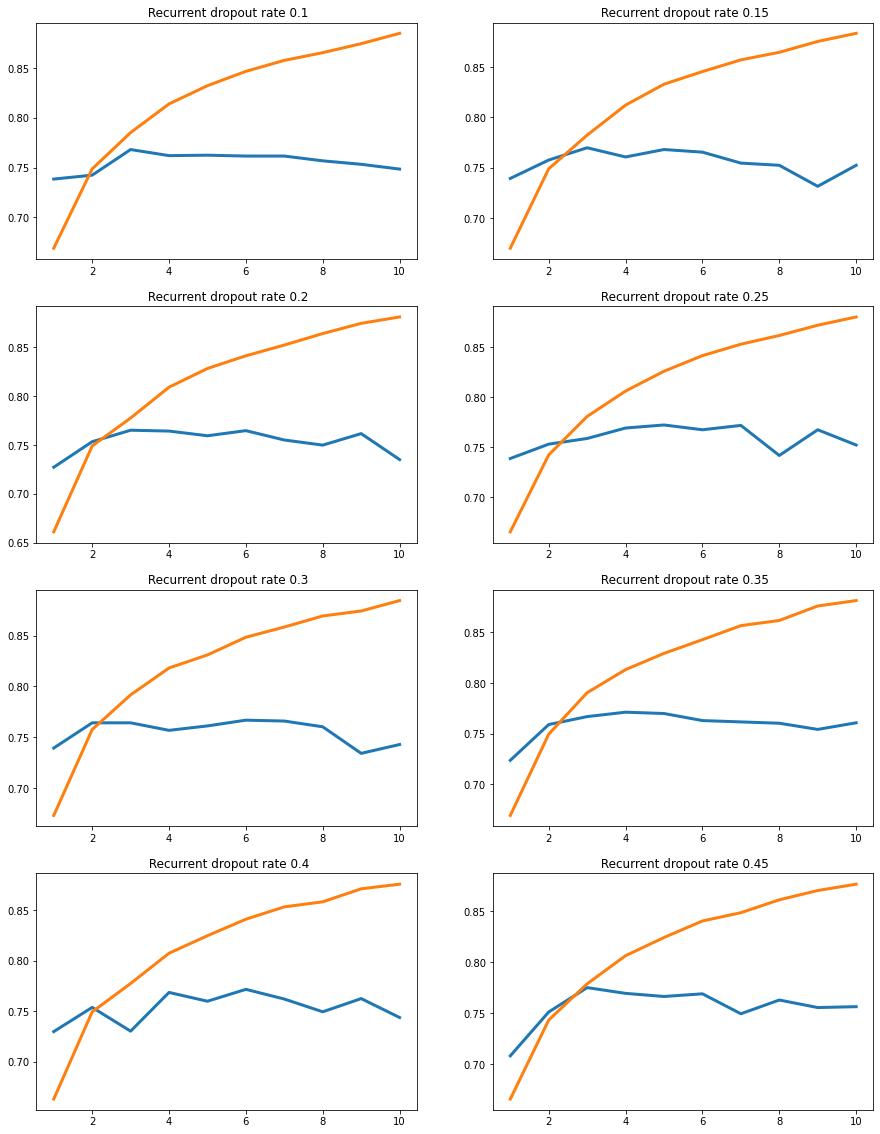

In [45]:
fig, ax = plt.subplots(4, 2, figsize=(15, 20))

x = range(1, 10 + 1)

count = 0

for i in range(4):
    for j in range(2):
        
        ax[i][j].plot(x, val_acc_list[count], label = list(history_dict.keys())[count], linewidth = 3)
        ax[i][j].plot(x, acc_list[count], label = list(history_dict.keys())[count], linewidth = 3)
        dropout_rate = np.round(list(history_dict.keys())[count], 2)
        dropout_str = " Recurrent dropout rate " + str(dropout_rate)
        ax[i][j].set_title(dropout_str)
        count = count + 1

**Comment:** Recurrent dropout 0.3 shows the best result, as per charts above. Another important point here  - find the best quantity of epochs. Evidently, the best oprion is 4 epochs, after that model shows great overfitting.

In [46]:
layer_name = str(best_option.index[0])
best_option.loc[layer_name,'recurrent_dropout'] = 0.3
best_option.loc[layer_name,'epochs'] = 4
best_option

,units,filter,loss,dropout,recurrent_dropout,epochs
LSTM,64.0,2.0,0.627508,0.45,0.3,4.0


**Comment:** In section 3 of this course work, the best set of parametrs was found. Using the parametrs printed above, I will train the NN model and make respective predictions.

## Results:

Here is trainning of the model built up on the best found set of parametrs and respective prediction:

In [47]:
my_NN, history = quick_build (words, features, max_len, sentiments, layer = best_option.index, 
                              units = int(best_option['units']), dropout = float(best_option['dropout']), 
                              recurrent_dropout = float(best_option['recurrent_dropout']),
                              filter_ = int(best_option['filter']), epochs = int(best_option['epochs']), 
                              save_history = True, patience = 6)
y_pred = my_NN.predict()
y_test = my_NN.y_test

Epoch 1/4
287/287 [==============================] - 9s 21ms/step - loss: 0.7657 - acc: 0.6714 - val_loss: 0.6320 - val_acc: 0.7467
Epoch 2/4
287/287 [==============================] - 6s 20ms/step - loss: 0.5946 - acc: 0.7617 - val_loss: 0.6220 - val_acc: 0.7384
Epoch 3/4
287/287 [==============================] - 6s 20ms/step - loss: 0.5246 - acc: 0.7924 - val_loss: 0.5849 - val_acc: 0.7690
Epoch 4/4
287/287 [==============================] - 6s 20ms/step - loss: 0.4732 - acc: 0.8157 - val_loss: 0.6018 - val_acc: 0.7563


### Evaluation

**`Metric 1.` Accuracy**: overall and per class.

In [48]:
# helper functiom that returns iverall test accuracy, dictionary of form {class:accuracy} adn
def accuracies(y_test, y_pred, labels):
    
    values, counts = np.unique(y_test, return_counts = True)
    test_dict = {k:v for k,v in zip(values,counts)}
    
    counters = np.zeros((len(labels)))
    correct_pred_dict = {k:v for k,v in zip(labels,counters)}
    
    for i in range(len(y_test)):
        for j in labels:
            if y_test[i] == j and y_pred[i] == j:
                correct_pred_dict[j] = correct_pred_dict[j] + 1
    
    accuracy_per_class = {}
    for i in correct_pred_dict:
        accuracy_per_class[i] =  np.round((correct_pred_dict[i]/test_dict[i]),2)
        
    accuracy = np.round(sum(correct_pred_dict.values())/len(y_test), 2)
    
    return accuracy, accuracy_per_class, correct_pred_dict
    

In [49]:
labels = np.unique(y_test)
accuracy, accuracy_per_class, correct_pred_dict = accuracies(y_test, y_pred, labels)

encode_dict = my_NN.encode_dict


print ("\nOverall accuracy is :", accuracy, "\n")

count = 0

for i in accuracy_per_class:
    print ("Accuracy of class", i, "or", list(encode_dict.keys())[count], accuracy_per_class[i])
    count = count + 1



Overall accuracy is : 0.75 

Accuracy of class 0 or negative 0.85
Accuracy of class 1 or neutral 0.6
Accuracy of class 2 or positive 0.56


**Comment :** Overall, performance of the model reached planned level of confidence - `75%`. It is important to notice that accuracies per classes are pretty different. The best accuracy is shown by negative class (0) - `85%`, which is much higher than for neutral class (`60%`) and positive class (`56%`). The most likely, it is caused by severe imbalance of the dataset, as it was shown in the first part of the course work. Quantity of negative samples heavily outweigh positive and neutral. Another reason might be presence of neutral class. I think it is quite complicated even for human to distinguish between neutral and positive classes, so it makes the task even more difficult. Neutral class is not only difficult to spot itself, it also contributes to worser positive class reocgnition. My assumption is that if the task were to classify only among 2 classes, performace would way better.

- Precision, recall and F1

In [50]:
def precision_recall_f1 (y_pred, y_test, cls, correct_pred_dict):
    
    precision = 0
    recall = 0
    correctly_predicted_all = correct_pred_dict [cls]
    predicted_overall = 0
    overall_qty = 0
    
    for i in range(len(y_pred)):
        if y_pred[i] == cls:
            predicted_overall = predicted_overall + 1
        if y_test[i] == cls:
            overall_qty = overall_qty + 1
    
    precision = correctly_predicted_all/predicted_overall
    recall = correctly_predicted_all/overall_qty
    f1 = 2*(precision * recall)/(precision + recall)
    
    return np.round(precision, 3), np.round(recall, 3), np.round(f1, 3)

In [51]:
prec_recall_arr = []

for i in encode_dict:
    tmp = (i, 
           precision_recall_f1(y_pred, y_test, encode_dict[i], correct_pred_dict)[0], 
           precision_recall_f1(y_pred, y_test, encode_dict[i], correct_pred_dict)[1],
           precision_recall_f1(y_pred, y_test, encode_dict[i], correct_pred_dict)[2])
    prec_recall_arr.append(tmp)

rec_prec = pd.DataFrame(prec_recall_arr, columns = ["Sentiment", "Precision", "Recall", "F1"])
rec_prec

,Sentiment,Precision,Recall,F1
0,negative,0.838,0.849,0.844
1,neutral,0.521,0.599,0.557
2,positive,0.755,0.565,0.646


**Comment:** 

*Precision* shows how many data points labeled as particular class really belong to this class. It means that almost `84%` of labels predicted as negative are really negative. The lowest precision is observed for neutral class - roughly only each second label predicted as neutral is really neutral. This figure again confirms that neutral class is quite complicated task and plays a difining role in model performance - somewhat less than half of neutral prediction is actually other classes. 

*Recall* figures shows that positive and negative classes to some extent may be affected by the neutral class low precsion - only `52%` of positives are recognized corretly and `84%` of negatives are predicted correctly. 

*F1 score* is said to be somethis in between recall and precision (https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1) and it indeed is.

- Confusion matrix



Confusion matrix: 



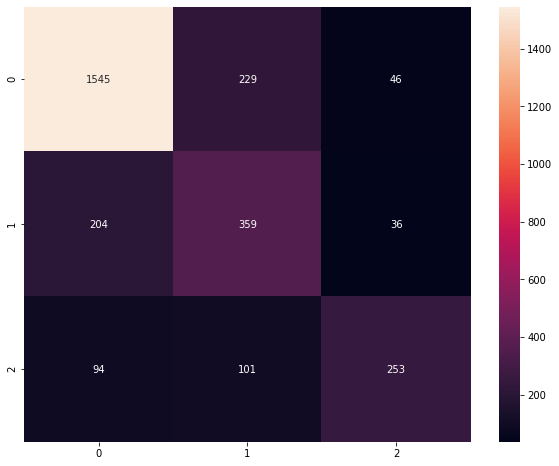

In [52]:
# confusion matrix
conf_matrix = tf.math.confusion_matrix(y_test, y_pred, num_classes=3, weights=None, 
                                       dtype=tf.dtypes.int32, name=None)


fig, ax = plt.subplots(figsize=(10,8))
print("\n\nConfusion matrix: \n")
sns.heatmap(conf_matrix, annot = conf_matrix, fmt = 'd')

**Comment**: Scince the dataset is very imbalanced, confusion matrix in absoluite values is quite hard to interpret. So, I will use confusion matrix in percents for analytics:



New confusion matrix in per-cent: 



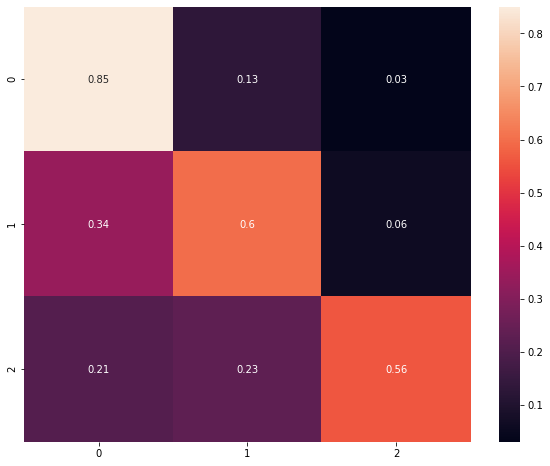

In [53]:
line_sum = 0
new_conf_matrix = np.zeros((3,3))

for i in range(3):
    line_sum = int(sum(conf_matrix[i]))
    for j in range(3):
        new_conf_matrix[i,j] = np.round(int(conf_matrix[i,j])/line_sum, 2)

        
fig, ax = plt.subplots(figsize=(10,8))
print("\n\nNew confusion matrix in per-cent: \n")
sns.heatmap(new_conf_matrix, annot = new_conf_matrix, fmt = '.2g')

**Comment:** This confusion matrix is quite different from the first one. Per-cent confusion matrix is more accurate as it is not influenced by the imbalance of the dataset. The first thing which caught my eye is that neutral class is actually more frequently predicted as negative (34% of neutral tweets are predicted as negative) while only 6% were mispredicted as positive. Postitive reviews themselves in 21% of cases are mispredicted as negative and only 3% of negative reviews are mispredicted as positive, which again shows the high influence of quantity of data samples belonging to each class.

### Conclusion

The best hyperparameters set is:

In [54]:
print("Tunned hyperparametrs:")
best_option

Tunned hyperparametrs:


,units,filter,loss,dropout,recurrent_dropout,epochs
LSTM,64.0,2.0,0.627508,0.45,0.3,4.0


The acrhitecture of the final model:

|Layer type   ||Option 1       |
|:------------||:--------------|
|**Input**    ||Embedding layer|
|             ||               |
|**Hidden**   ||Conv1D         |
|             ||MaxPooling     |
|             ||LSTM           |
|             ||               |
|**Output**   ||Dense          |



The model reached 75% accuracy and satisfied baseline accuracy that was set up in the first section of the coursework. Apparently, for real life applications this level of confidence is not enough. At the same time, in my opinion real life tasks ancticipate better data: balanced and overall bigger. 

I think, that if the task was to distinguish only between positive and negative reviews, accuracy would be much higher. Negative recall is anyway quite high, but this may potentially improve recall of the positive class.

Even though dropout rates were intriduced, all models showed ovefitting, which means: (a) no more complicated decision borders are required; (b) we need to get more data.

Not only hyperparametrs influence on the model performance in NLP. Another inportant meber is actually the way data was prepared: how it was cleaned, how it was encoded, which length of vocabluary you used, which length of vecoters.

And hence, here is the follwing suggestions:

1. Balance dataset by providing more tweets with neutral and positive reviews.
2. Make sure neutral reviews are marked correctly and really are not negative.
3. Try pre-trained word-embeddings or other tokenizers istead of keras tokenizer.
4. Play with length of dictionary and encoded vectors: e.g. try to use only top 75% used tokens, deacrease length of the vecotr, etc.